In [10]:
import numpy
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.image_data_format()

'channels_last'

In [11]:
seed = 7
numpy.random.seed(seed)

In [12]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [13]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [14]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [15]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(X_train.shape[1:]), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [16]:
epochs = 5
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [17]:
history=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)

Epoch 1/5
1563/1563 [==============================] - 280s 173ms/step - loss: 1.9238 - accuracy: 0.2999 - val_loss: 1.4828 - val_accuracy: 0.4689
Epoch 2/5
1563/1563 [==============================] - 263s 169ms/step - loss: 1.4808 - accuracy: 0.4685 - val_loss: 1.3032 - val_accuracy: 0.5404
Epoch 3/5
1563/1563 [==============================] - 268s 171ms/step - loss: 1.3165 - accuracy: 0.5307 - val_loss: 1.2564 - val_accuracy: 0.5457
Epoch 4/5
1563/1563 [==============================] - 279s 179ms/step - loss: 1.2315 - accuracy: 0.5615 - val_loss: 1.1696 - val_accuracy: 0.5842
Epoch 5/5
1563/1563 [==============================] - 279s 179ms/step - loss: 1.1739 - accuracy: 0.5881 - val_loss: 1.1321 - val_accuracy: 0.5977


In [24]:

scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy before adding qsn1: %.2f%%" % (scores[1]*100))

Accuracy before adding qsn1: 59.77%


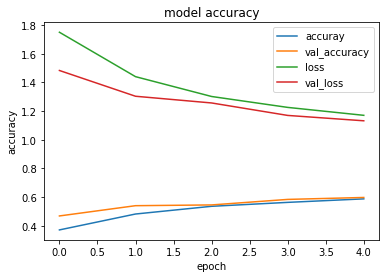

In [25]:
import matplotlib.pyplot as plt
# summarize history for accuracy&loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuray', 'val_accuracy','loss','val_loss'], loc='upper right')
plt.show()

In [26]:
# Adding more layers

m = Sequential()
m.add(Conv2D(32, (3, 3), input_shape=(X_train.shape[1:]), padding='same', activation='relu'))
m.add(Dropout(0.2))
m.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
m.add(MaxPooling2D(pool_size=(2, 2)))
m.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
m.add(Dropout(0.2))
m.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
m.add(MaxPooling2D(pool_size=(2, 2)))
m.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
m.add(Dropout(0.2))
m.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
m.add(MaxPooling2D(pool_size=(2, 2)))
m.add(Flatten())
m.add(Dropout(0.2))
m.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3)))
m.add(Dropout(0.2))
m.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
m.add(Dropout(0.2))
m.add(Dense(num_classes, activation='softmax'))

In [27]:
epochs = 5
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
m.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [28]:
print(m.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_2 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_3 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 64)       

In [29]:
history1=m.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=128)

Epoch 1/5
391/391 [==============================] - 326s 832ms/step - loss: 2.2001 - accuracy: 0.1671 - val_loss: 1.9759 - val_accuracy: 0.3052
Epoch 2/5
391/391 [==============================] - 326s 833ms/step - loss: 1.8255 - accuracy: 0.3344 - val_loss: 1.6356 - val_accuracy: 0.4065
Epoch 3/5
391/391 [==============================] - 324s 830ms/step - loss: 1.6149 - accuracy: 0.4089 - val_loss: 1.5197 - val_accuracy: 0.4540
Epoch 4/5
391/391 [==============================] - 321s 822ms/step - loss: 1.5193 - accuracy: 0.4498 - val_loss: 1.4996 - val_accuracy: 0.4597
Epoch 5/5
391/391 [==============================] - 322s 823ms/step - loss: 1.4516 - accuracy: 0.4766 - val_loss: 1.3938 - val_accuracy: 0.5009


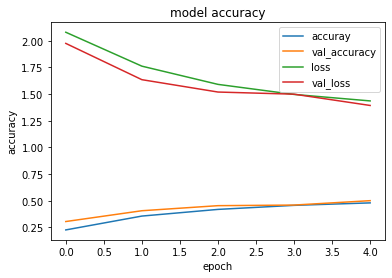

In [30]:
# summarize history for accuracy&loss
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuray', 'val_accuracy','loss','val_loss'], loc='upper right')
plt.show()


In [31]:
scores = m.evaluate(X_test, y_test, verbose=0)
print("Accuracy after qsn1: %.2f%%" % (scores[1]*100))

Accuracy after qsn1: 50.09%


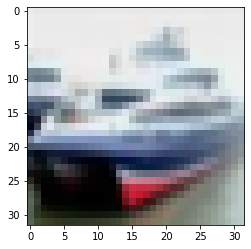

actual [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.] predicted 1


C:\Users\Administrator\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


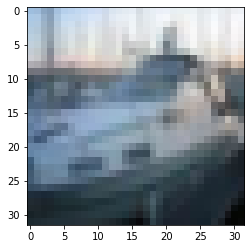

actual [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.] predicted 8


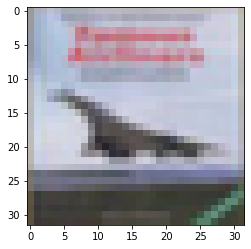

actual [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] predicted 8


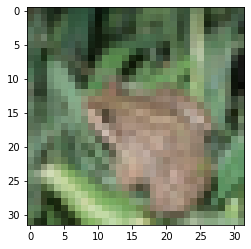

actual [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.] predicted 4


In [32]:
import matplotlib.pyplot as plt
for k in range(1,5):
    plt.imshow(X_test[k,:,:])  
    plt.show()
    y=model.predict_classes(X_test[[k],:])
    print("actual",y_test[k],"predicted",y[0])

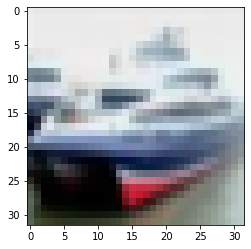

actual [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.] predicted 1


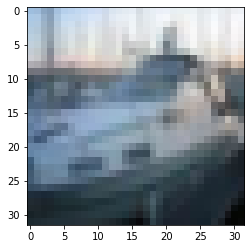

actual [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.] predicted 8


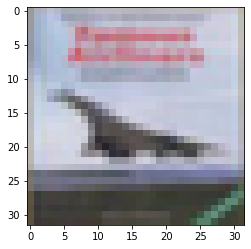

actual [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] predicted 8


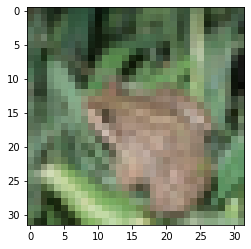

actual [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.] predicted 4


In [33]:
# save and model
model.save('model1.h5')
from keras.models import load_model
model = load_model('model1.h5')
for k in range(1,5):
    plt.imshow(X_test[k,:,:])  
    plt.show()
    y=model.predict_classes(X_test[[k],:])
    print("actual",y_test[k],"predicted",y[0])